# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#API CALL URL = http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={YOUR API KEY}
base_url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
weather_api_key = "1c8babe22822ec7715d3f85b5b6dcd85"
url = base_url + weather_api_key
url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1c8babe22822ec7715d3f85b5b6dcd85'

In [4]:
# Make call
response = requests.get(url)
weather_json = response.json()
weather_json

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1592697600,
   'main': {'temp': 290.17,
    'feels_like': 286.95,
    'temp_min': 289.29,
    'temp_max': 290.17,
    'pressure': 1016,
    'sea_level': 1016,
    'grnd_level': 1000,
    'humidity': 68,
    'temp_kf': 0.88},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 77},
   'wind': {'speed': 5.09, 'deg': 63},
   'sys': {'pod': 'n'},
   'dt_txt': '2020-06-21 00:00:00'},
  {'dt': 1592708400,
   'main': {'temp': 288.82,
    'feels_like': 284.8,
    'temp_min': 288.22,
    'temp_max': 288.82,
    'pressure': 1016,
    'sea_level': 1016,
    'grnd_level': 1000,
    'humidity': 61,
    'temp_kf': 0.6},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04d'}],
   'clouds': {'all': 98},
   'wind': {'speed': 5.14, 'deg': 63},
   'sys': {'pod': 'd'},
   'dt_txt': '2020-06-21 03:00:00'},
  {'dt': 159

In [26]:
# print(json.dumps(weather_json, indent=4, sort_keys=True))
# print location
json.dumps(weather_json, indent=4, sort_keys=True)
print(weather_json["city"]['name'])

Bac Lieu


In [27]:
# Per isntructions - For final notebook, perform a weather check on each of... 
# ...the cities using a series of successive API calls
# Create empty lists to hold response information
city_id = []
city_name = []
cloudiness = []
country = []
lat = []
lng = []
date = []
max_temp = []
humidity = []
wind_speed = []
count = 0

# Loop through city list and request data from each city for the variables above, print N/A for those not found
for city in cities:
    response = requests.get(url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    try:
        city_id.append(weather_json['city']['id'])
        city_name.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        date.append(weather_json['list'][0]['dt'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"City {count} | {city}")
    except:
        print("Record n/a") 
        pass
        
print("Complete!")

City 1 | bluff
City 2 | kankan
Record n/a
City 3 | olafsvik
Record n/a
Record n/a
City 4 | kothapet
City 5 | rikitea
City 6 | atuona
City 7 | cidreira
City 8 | punta arenas
City 9 | aklavik
City 10 | upernavik
City 11 | jamestown
City 12 | qaanaaq
City 13 | airai
City 14 | basco
City 15 | alice springs
City 16 | hovd
City 17 | catumbela
City 18 | kahului
City 19 | da nang
Record n/a
City 20 | moura
City 21 | tasiilaq
City 22 | kapaa
City 23 | visnes
City 24 | ushuaia
City 25 | busselton
City 26 | waldkirch
City 27 | djougou
City 28 | chuy
City 29 | souillac
City 30 | haines junction
Record n/a
City 31 | high rock
City 32 | labuhan
City 33 | sabang
City 34 | rongcheng
City 35 | stepnogorsk
City 36 | parrita
City 37 | chitipa
City 38 | jurm
City 39 | east london
City 40 | abha
City 41 | carnarvon
City 42 | esperance
City 43 | xuddur
City 44 | nouadhibou
City 45 | bredasdorp
City 46 | xai-xai
City 47 | arraial do cabo
City 48 | avera
City 49 | thompson
City 50 | khasan
City 51 | nemuro
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Per isntructions - For final notebook, save a csv of all retrieved data
weather_df.to_csv(r'output_data\weater_data.csv')
total_cities = len(weather_df)
total_cities

557

In [89]:
# Display the data
# Create weather dictionary from attributes in loop. Use this dictionary to create a pandas data frame.
weather_dictionary = {
                     "City ID": city_id,
                     "City": city_name,
                     "Country": country,
                     "Latitude": lat,
                     "Longitude": lng,
                     "Date": date,
                     "Max. Temperature (F)": max_temp,
                     "Cloudiness (%)": cloudiness,
                     "Humidity (%)": humidity,
                     "Wind Speed (mph)": wind_speed}

# Data Frame
weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()  

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,2206939,Bluff,NZ,-46.6000,168.3333,1592697600,44.11,15,79,7.76
1,2419992,Kankan,GN,10.3854,-9.3057,1592697600,76.86,36,78,4.81
2,3414079,Olafsvik,IS,64.8945,-23.7142,1592697600,51.17,72,87,2.37
3,1265996,Kothāpet,IN,19.3333,79.4833,1592697600,82.63,100,70,4.36
4,4030556,Rikitea,PF,-23.1203,-134.9692,1592697600,76.06,62,83,11.81


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [90]:
weather_df.sort_values("Humidity (%)", ascending=False)

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
322,336496,Gimbi,ET,9.1667,35.8333,1592697600,57.20,92,100,3.11
258,2027316,Ayan,RU,56.4500,138.1667,1592697600,42.10,100,98,6.73
490,5261852,Marinette,US,45.1000,-87.6307,1592697600,63.61,95,98,5.28
116,1795632,Shenjiamen,CN,29.9576,122.2980,1592697600,71.13,100,97,17.00
350,3671450,Inírida,CO,3.8653,-67.9239,1592697600,75.34,100,97,1.92
...,...,...,...,...,...,...,...,...,...,...
380,5503914,Fallon,US,39.4735,-118.7774,1592697600,94.03,81,11,10.38
267,2450173,Taoudenni,ML,22.6783,-3.9836,1592697600,103.51,32,8,9.19
355,5329649,Blythe,US,33.6103,-114.5964,1592697600,106.32,1,8,10.29
216,5546220,Saint George,US,37.1041,-113.5841,1592697600,98.47,17,8,9.57


In [91]:
# AFTER SORTING BY DESCENDING HUMIDITY, THERE ARE NO VALUES THAT SHOW HUMIDITY OVER 100%

In [92]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [93]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

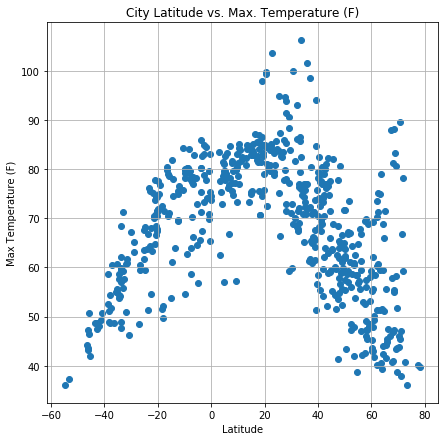

In [105]:
# Create scatter plot to showcase Temperature (F) vs. Latitude
plot_lat = weather_df['Latitude']
plot_temp = weather_df['Max. Temperature (F)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_temp)
plt.title('City Latitude vs. Max. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('temp_vs_lat_scatter')
plt.show()

## Latitude vs. Humidity Plot

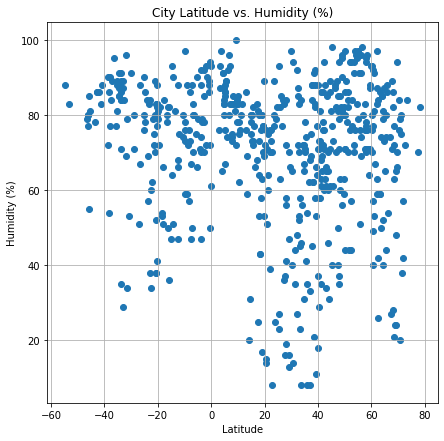

In [106]:
# Create scatter plot to showcase Humidity (%) vs. Latitude
plot_lat = weather_df['Latitude']
plot_hum = weather_df['Humidity (%)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_hum)
plt.title('City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('hum_vs_lat_scatter')
plt.show()

## Latitude vs. Cloudiness Plot

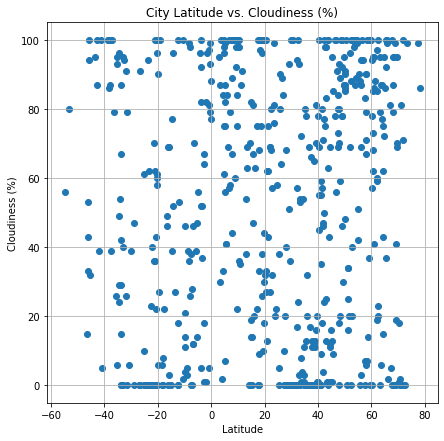

In [107]:
# Create scatter plot to showcase Cloudiness (%) vs. Latitude
plot_lat = weather_df['Latitude']
plot_cloud = weather_df['Cloudiness (%)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_cloud)
plt.title('City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('cloud_vs_lat_scatter')
plt.show()

## Latitude vs. Wind Speed Plot

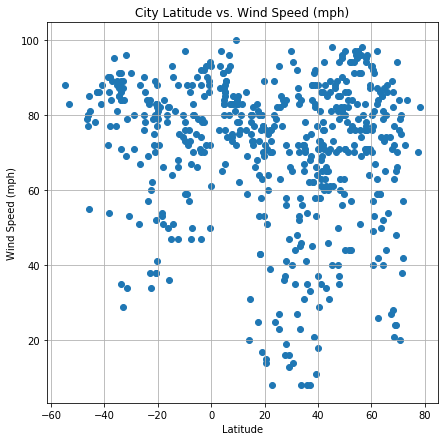

In [112]:
# Create scatter plot to showcase Wind Speed (mph) vs. Latitude
plot_lat = weather_df['Latitude']
plot_wind = weather_df['Wind Speed (mph)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_hum)
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('wind_vs_lat_scatter')
plt.show()

In [109]:
# Can't determine why wind scatter is showing much higher values than are shown in the dataframe...
weather_df.sort_values("Wind Speed (mph)", ascending=False)

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
126,64814,Bandarbeyla,SO,9.4942,50.8122,1592697600,79.74,98,72,27.40
70,1507390,Dikson,RU,73.5069,80.5464,1592697600,35.98,99,84,25.12
448,3421193,Paamiut,GL,61.9940,-49.6678,1592697600,40.10,85,83,24.83
62,57000,Hobyo,SO,5.3505,48.5268,1592697600,79.70,7,67,24.74
449,4036284,Alofi,NU,-19.0595,-169.9187,1592697600,76.82,100,82,24.16
...,...,...,...,...,...,...,...,...,...,...
498,1808857,Hanzhong,CN,33.0728,107.0303,1592697600,69.01,93,83,0.63
545,2088659,Panguna,PG,-6.3164,155.4848,1592697600,82.76,70,80,0.58
39,110690,Abhā,SA,18.2164,42.5053,1592697600,70.72,97,43,0.47
465,1801792,Luoyang,CN,34.6836,112.4536,1592697600,76.15,3,31,0.45


## Linear Regression

In [123]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [119]:
# Create Northern and Southern Hemisphere DataFrames
# Run linear regression on each relationship, separating them into... 
# ...Northern Hemisphere (greater than or equal to 0 degrees latitude) and...
# ...Southern Hemisphere (less than 0 degrees latitude)

In [120]:
# Create Northern Hemisphere DF
north_df = weather_df.loc[weather_df['Latitude'] >= 0,:]
north_df.head()

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
1,2419992,Kankan,GN,10.3854,-9.3057,1592697600,76.86,36,78,4.81
2,3414079,Olafsvik,IS,64.8945,-23.7142,1592697600,51.17,72,87,2.37
3,1265996,Kothāpet,IN,19.3333,79.4833,1592697600,82.63,100,70,4.36
8,5882953,Aklavik,CA,68.2191,-135.0107,1592697600,46.78,95,82,15.12
9,3418910,Upernavik,GL,72.7868,-56.1549,1592697600,40.77,0,72,9.55


In [121]:
# Create Southern Hemisphere DF
south_df = weather_df.loc[weather_df['Latitude'] < 0,:]
south_df.head()

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,2206939,Bluff,NZ,-46.6000,168.3333,1592697600,44.11,15,79,7.76
4,4030556,Rikitea,PF,-23.1203,-134.9692,1592697600,76.06,62,83,11.81
5,4020109,Atuona,PF,-9.8000,-139.0333,1592697600,79.95,4,73,11.90
6,3466165,Cidreira,BR,-30.1811,-50.2056,1592697600,67.23,39,91,9.26
7,3874787,Punta Arenas,CL,-53.1500,-70.9167,1592697600,37.38,80,83,7.07


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

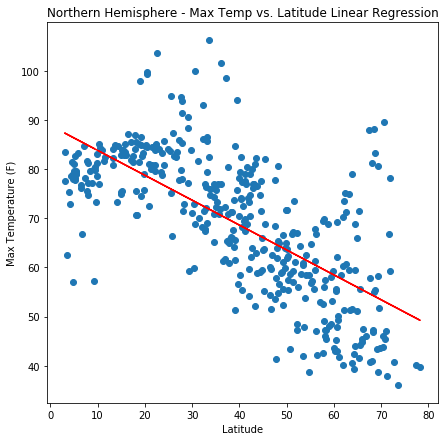

In [144]:
# Run linear regression on Northern Hemisphere - Max Temp vs. Latitude
north_df_lat = north_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
north_df_temp = north_df['Max. Temperature (F)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(north_df_lat, north_df_temp)  # perform linear regression
north_df_temp_pred = linear_regressor.predict(north_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(north_df_lat, north_df_temp)
plt.plot(north_df_lat, north_df_temp_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('north_temp_lat_lr')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

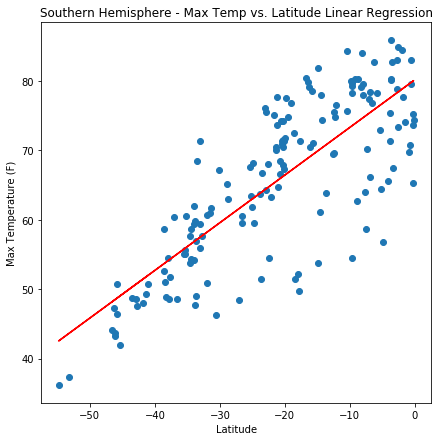

In [143]:
# Run linear regression on Southern Hemisphere - Max Temp vs. Latitude
south_df_lat = south_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
south_df_temp = south_df['Max. Temperature (F)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(south_df_lat, south_df_temp)  # perform linear regression
south_df_temp_pred = linear_regressor.predict(south_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(south_df_lat, south_df_temp)
plt.plot(south_df_lat, south_df_temp_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('south_temp_lat_lr')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

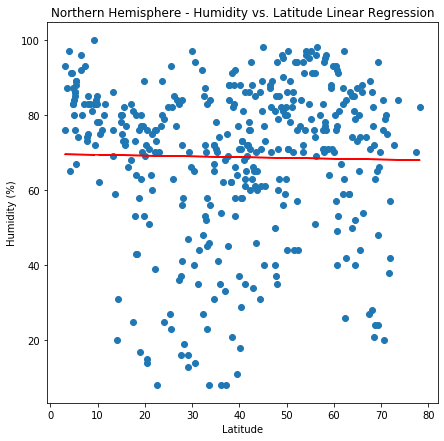

In [142]:
# Run linear regression on Northern Hemisphere - Humidity (%) vs. Latitude
north_df_lat = north_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
north_df_hum = north_df['Humidity (%)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(north_df_lat, north_df_hum)  # perform linear regression
north_df_hum_pred = linear_regressor.predict(north_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(north_df_lat, north_df_hum)
plt.plot(north_df_lat, north_df_hum_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('north_hum_lat_lr')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

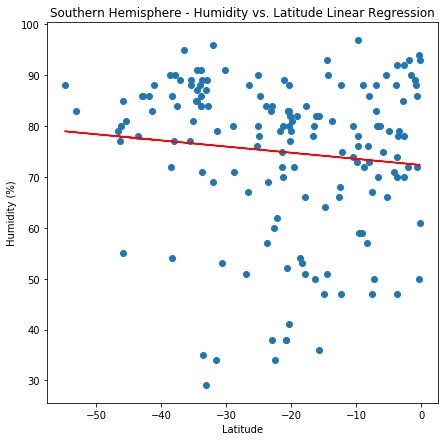

In [145]:
# Run linear regression on Southern Hemisphere - Humidity (%) vs. Latitude
south_df_lat = south_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
south_df_hum = south_df['Humidity (%)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(south_df_lat, south_df_hum)  # perform linear regression
south_df_hum_pred = linear_regressor.predict(south_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(south_df_lat, south_df_hum)
plt.plot(south_df_lat, south_df_hum_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('south_hum_lat_lr')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

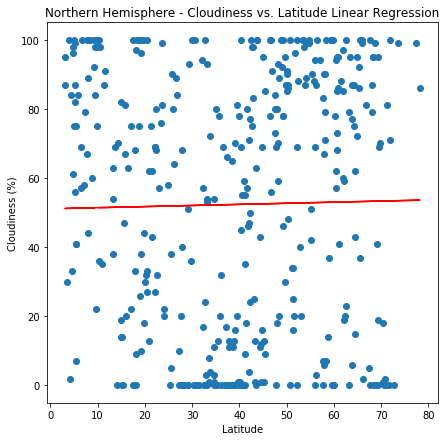

In [146]:
# Run linear regression on Northern Hemisphere - Cloudiness (%) vs. Latitude
north_df_lat = north_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
north_df_cloud = north_df['Cloudiness (%)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(north_df_lat, north_df_cloud)  # perform linear regression
north_df_cloud_pred = linear_regressor.predict(north_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(north_df_lat, north_df_cloud)
plt.plot(north_df_lat, north_df_cloud_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('north_cloud_lat_lr')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

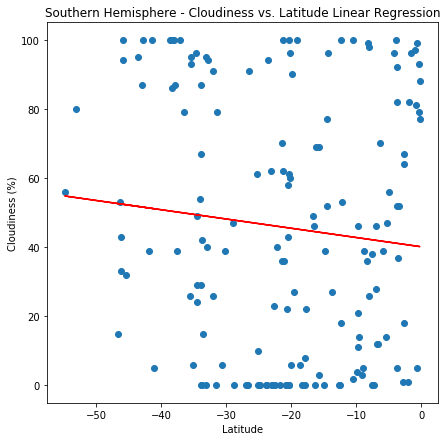

In [147]:
# Run linear regression on Southern Hemisphere - Cloudiness (%) vs. Latitude
south_df_lat = south_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
south_df_cloud = south_df['Cloudiness (%)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(south_df_lat, south_df_cloud)  # perform linear regression
south_df_cloud_pred = linear_regressor.predict(south_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(south_df_lat, south_df_cloud)
plt.plot(south_df_lat, south_df_cloud_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('south_cloud_lat_lr')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

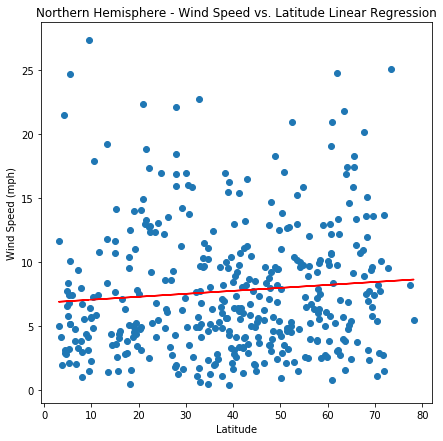

In [148]:
# Run linear regression on Northern Hemisphere - Wind Speed (mph) vs. Latitude
north_df_lat = north_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
north_df_wind = north_df['Wind Speed (mph)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(north_df_lat, north_df_wind)  # perform linear regression
north_df_wind_pred = linear_regressor.predict(north_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(north_df_lat, north_df_wind)
plt.plot(north_df_lat, north_df_wind_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('north_wind_lat_lr')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

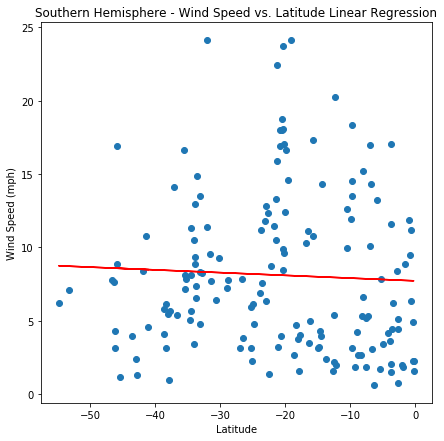

In [149]:
# Run linear regression on Southern Hemisphere - Wind Speed (mph) vs. Latitude
south_df_lat = south_df['Latitude'].values.reshape(-1, 1)  # values converts it into a numpy array
south_df_wind = south_df['Wind Speed (mph)'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(south_df_lat, south_df_wind)  # perform linear regression
south_df_wind_pred = linear_regressor.predict(south_df_lat)  # make predictions

plt.figure(figsize=(7,7))
plt.scatter(south_df_lat, south_df_wind)
plt.plot(south_df_lat, south_df_wind_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('south_wind_lat_lr')
plt.show()

In [150]:
print("statement about linear regressions")

statement about linear regressions
